* data:  GTEx count data with $(n,p) = (11688,55863)$

* method: 
    * apply `rsvd` to count data $X$ with D = 200
    * Use the $d = 50$ top components to approximate count with $\hat{X}$ (set negative elements to 0)
    * apply `betanmf` (NMF_GKL with lee's mu update) to $\hat{X}$
    
* Result: 
   
    * The quality of approximation of original data using first 50 components is shown https://github.com/zihao12/lowrank-nmf/blob/master/output/gtex_approx_rsvd_d50_scatter.png
    
    * The loss vs niter are shown below. betanmf clearly has an advantage over rsvdbetanmf. Also, my experiments on other methods (ccd) have a cost similar to that of betanmf. It seems we are losing information when doing the approximation. 

    * Some factors from the two methods are quite different

# Loss

min cost for betanmf on X:     -6.426097e+12
min cost for rsvdbetanmf on X: -6.408601e+12


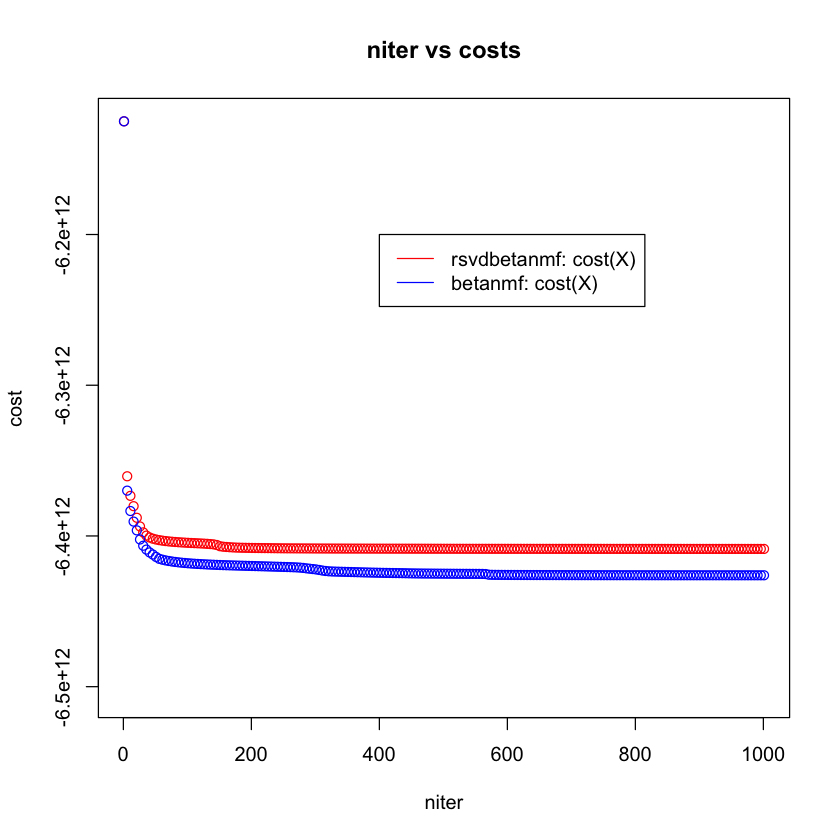

In [1]:
err0 = read.csv("../bigdata/gtex_error_betanmf.csv", header = F) 
err = read.csv("../bigdata/gtex_error_rsvdbetanmf_d50.csv", header = F)

cat(sprintf("min cost for betanmf on X:     %12e\n", min(err0)))
cat(sprintf("min cost for rsvdbetanmf on X: %12e\n", min(err[,1])))

niter = nrow(err)
idx = seq(1,niter, 5)
plot(idx, err[idx,1], col = "red", ylim = c(min(err), max(err)), xlab = "niter", ylab = "cost",
    main = "niter vs costs")
points(idx,err0[idx,1], col = "blue")
legend(x = 400, y = -6.2e+12, legend = c("rsvdbetanmf: cost(X)", "betanmf: cost(X)"), 
       col = c("red", "blue"), lty = 1:1:1)


# Compare factor/loadings

In [2]:
datadir = "../bigdata/"
method1 = "betanmf"
method2 = "rsvdbetanmf_d50"
fname1 = sprintf("gtex_factors_%s.csv", method1)
fname2 = sprintf("gtex_factors_%s.csv", method2)
f1 = read.csv(sprintf("%s%s", datadir, fname1), header = F)
f2 = read.csv(sprintf("%s%s", datadir, fname2), header = F)

lname1 = sprintf("gtex_loadings_%s.csv", method1)
lname2 = sprintf("gtex_loadings_%s.csv", method2)
l1 = read.csv(sprintf("%s%s", datadir, lname1), header = F)
l2 = read.csv(sprintf("%s%s", datadir, lname2), header = F)

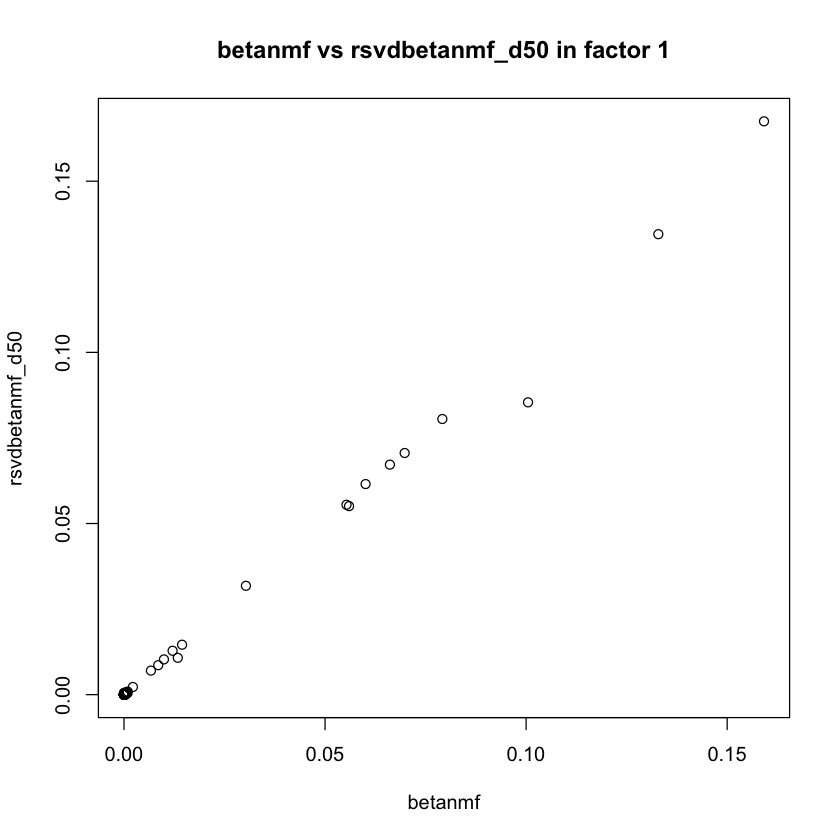

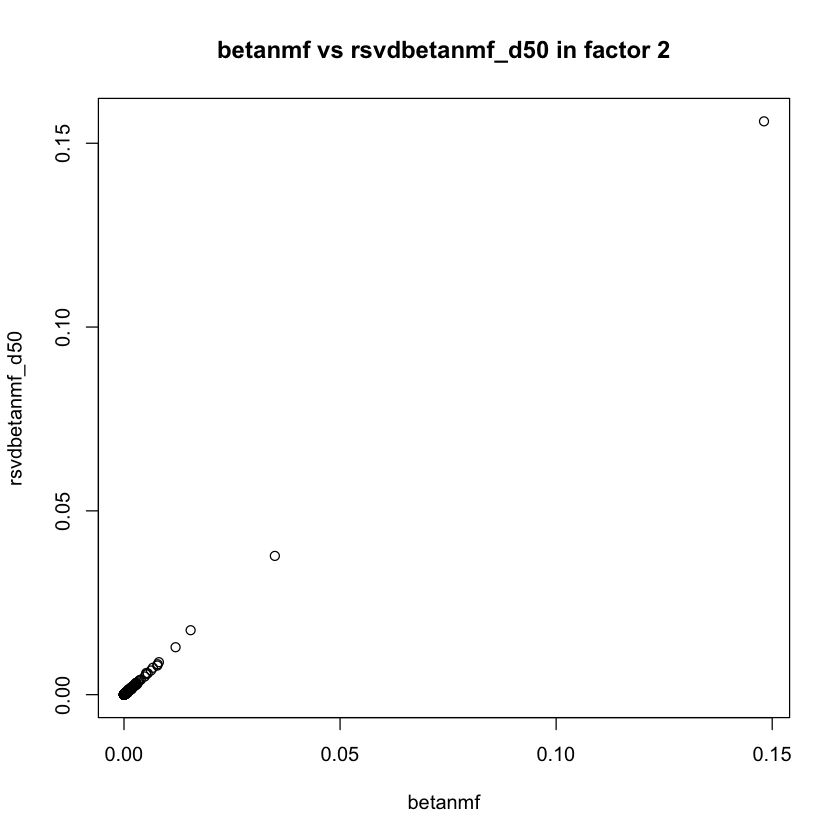

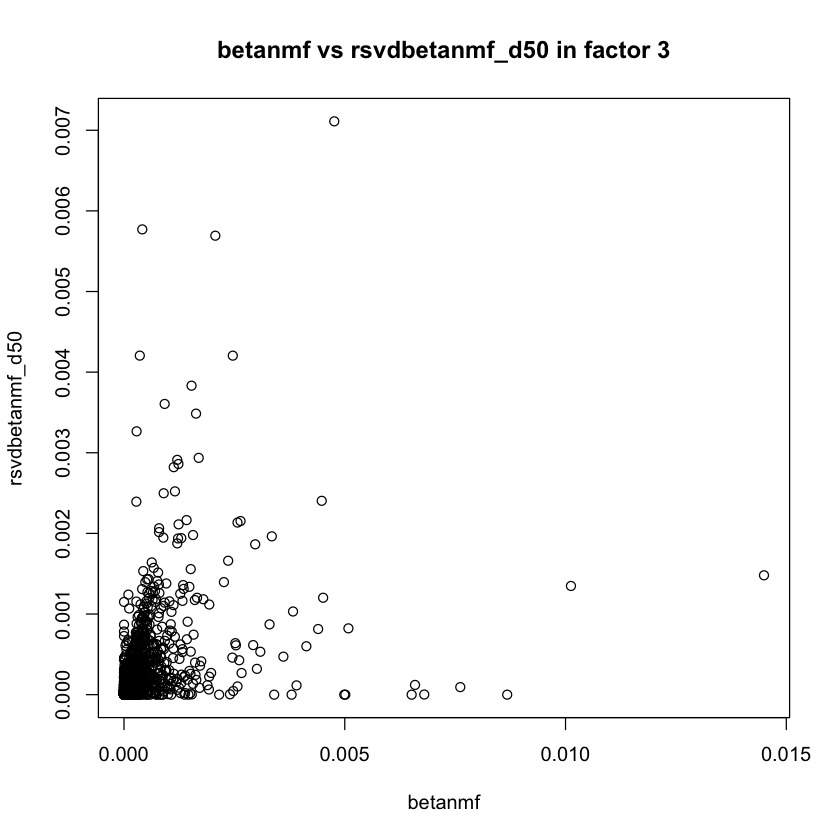

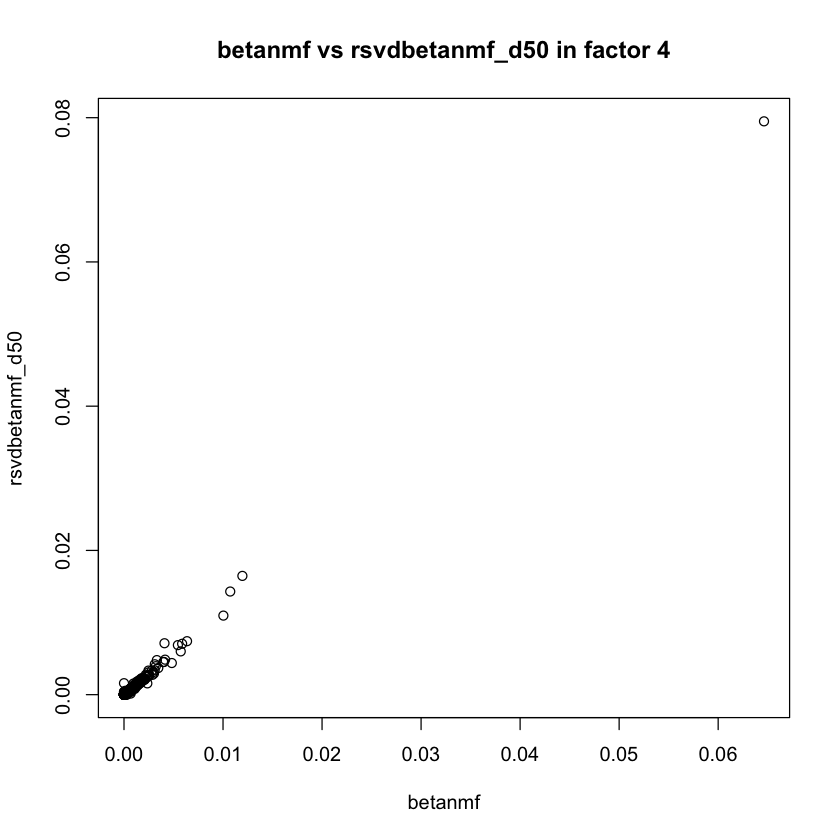

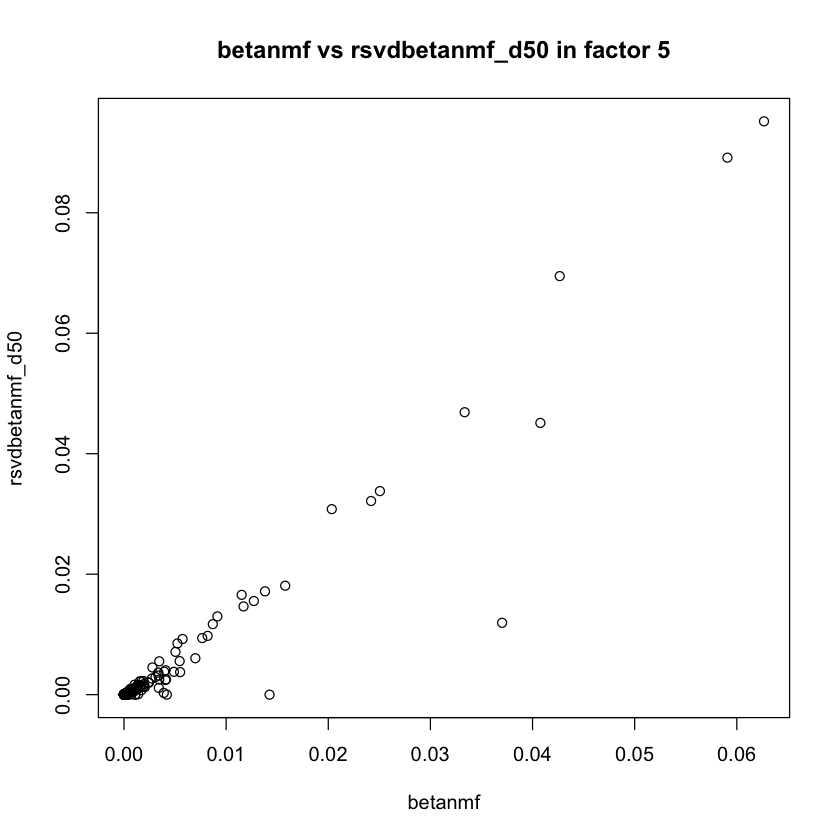

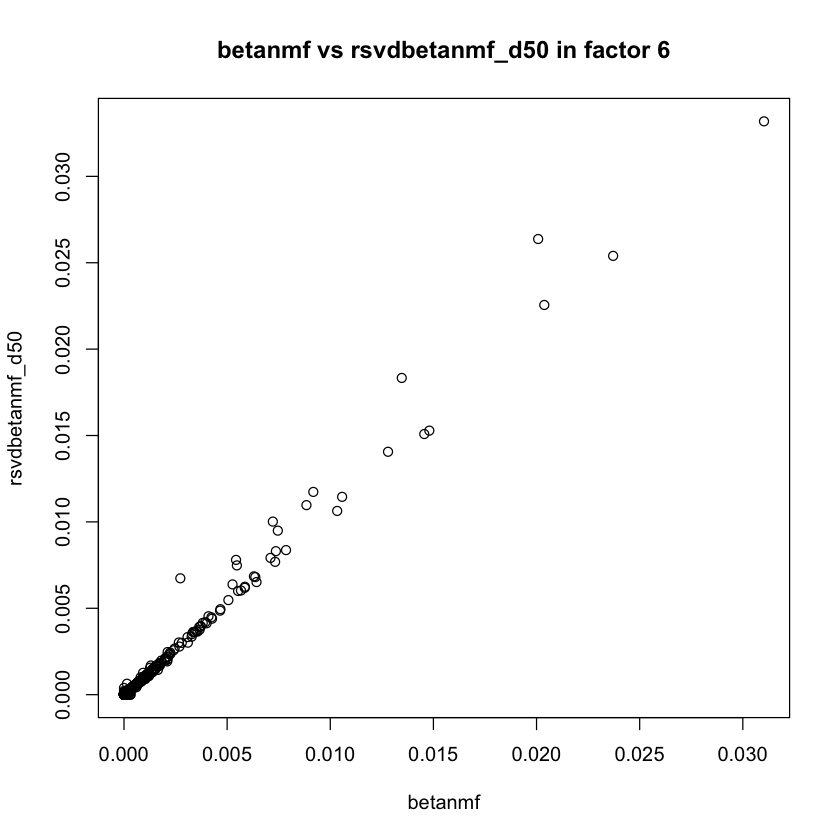

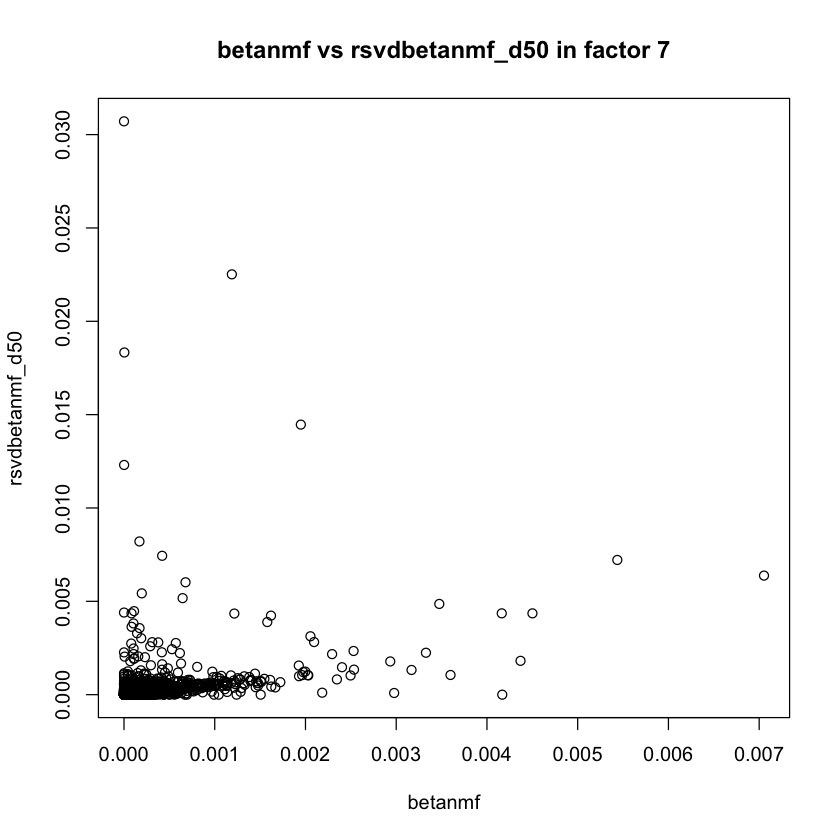

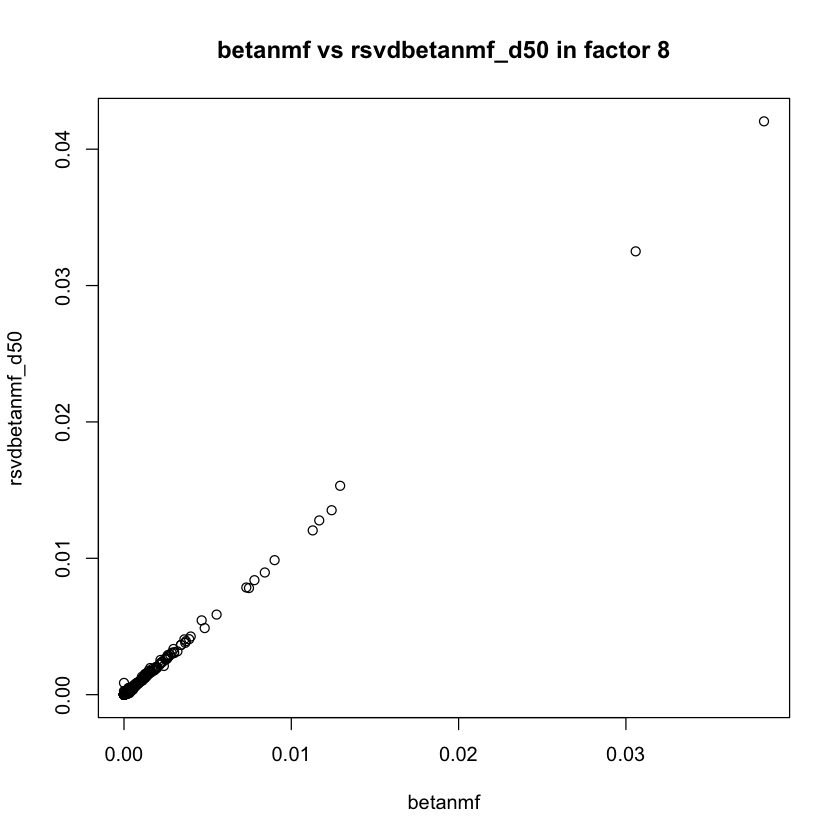

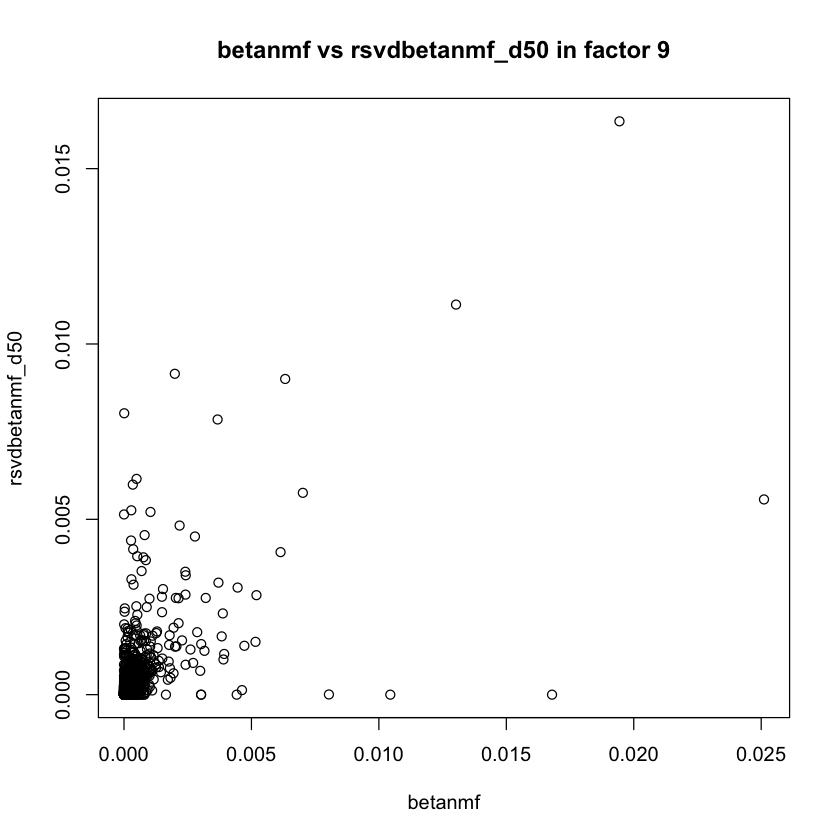

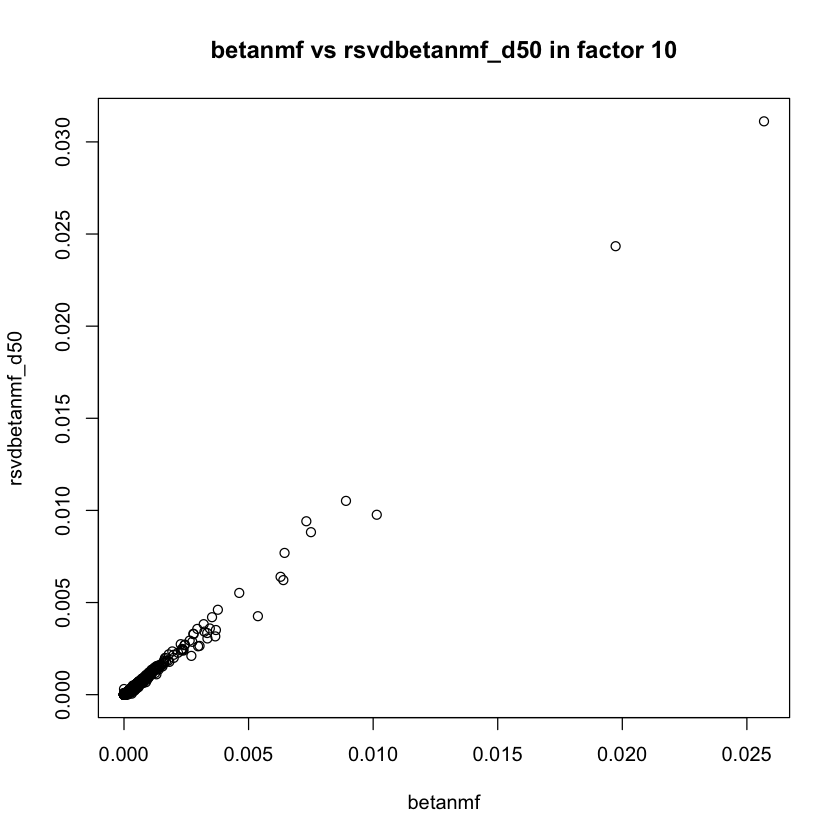

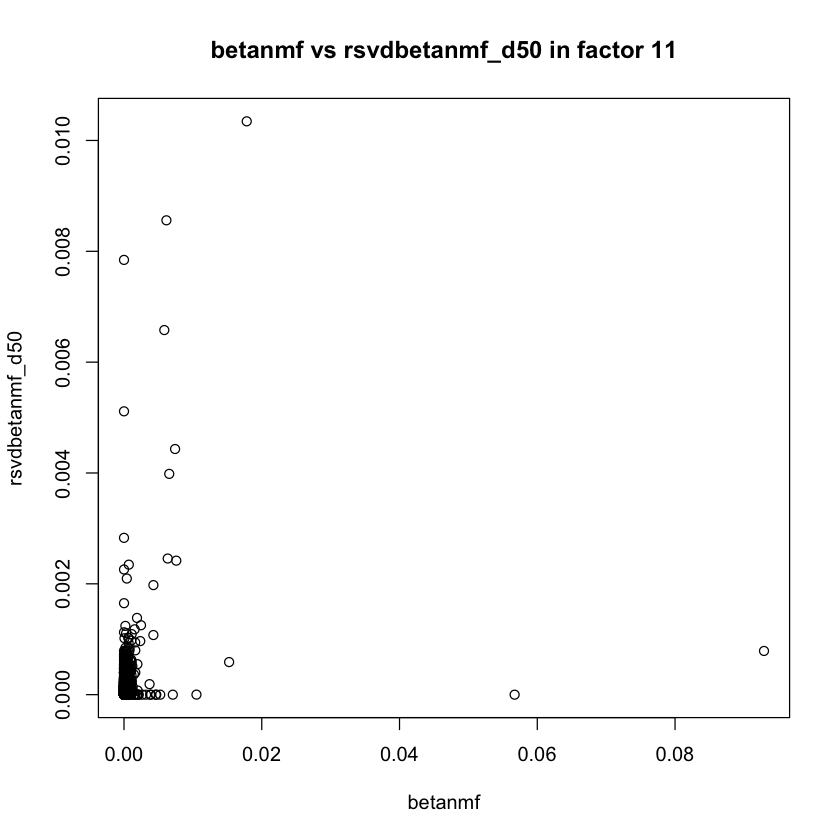

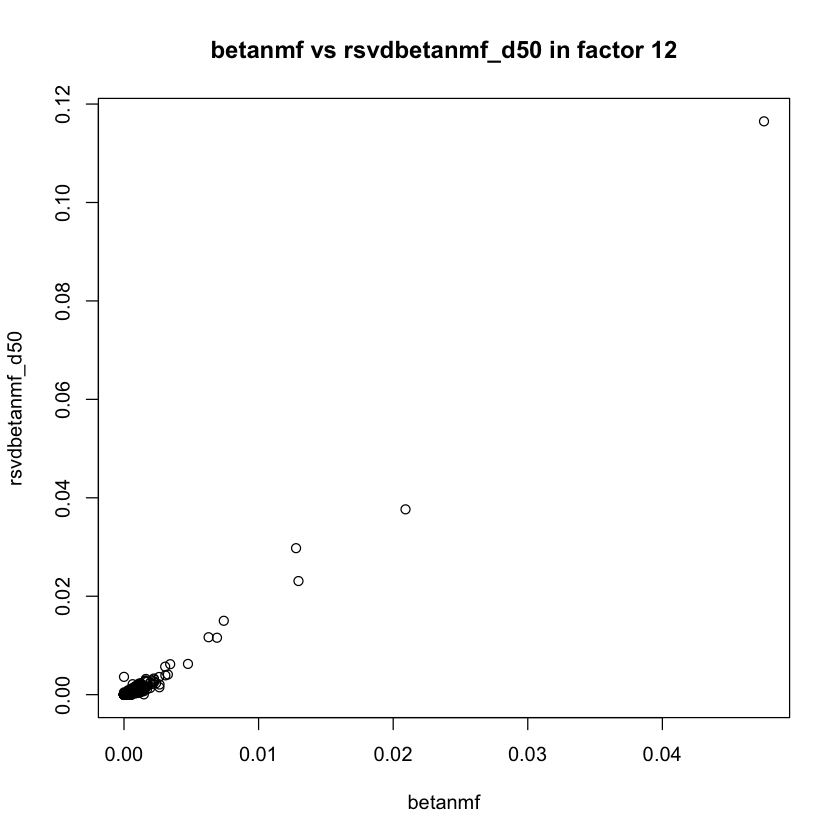

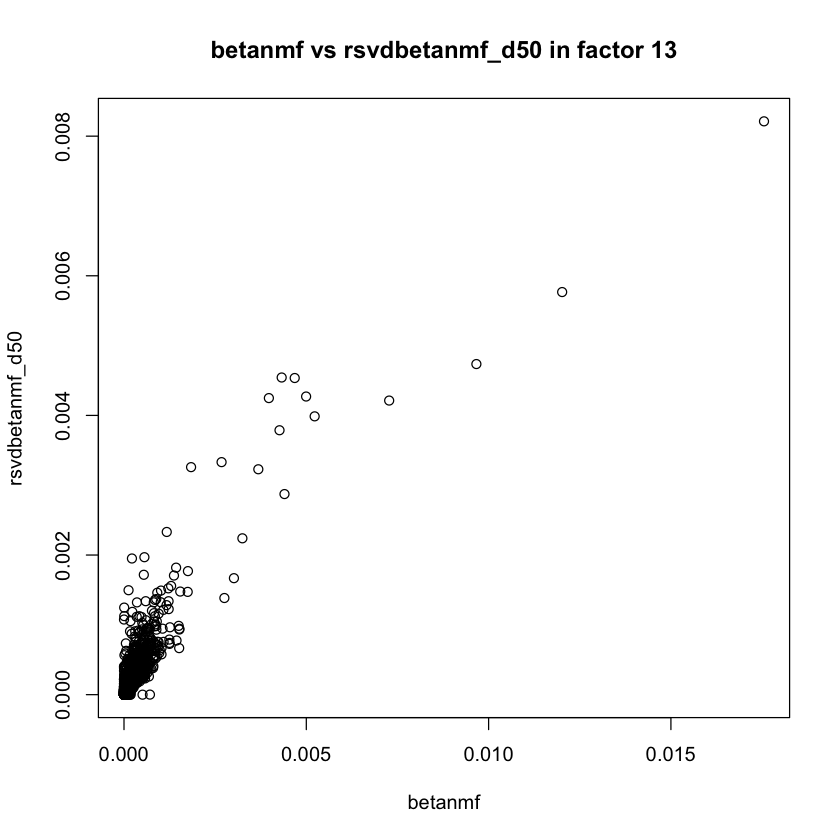

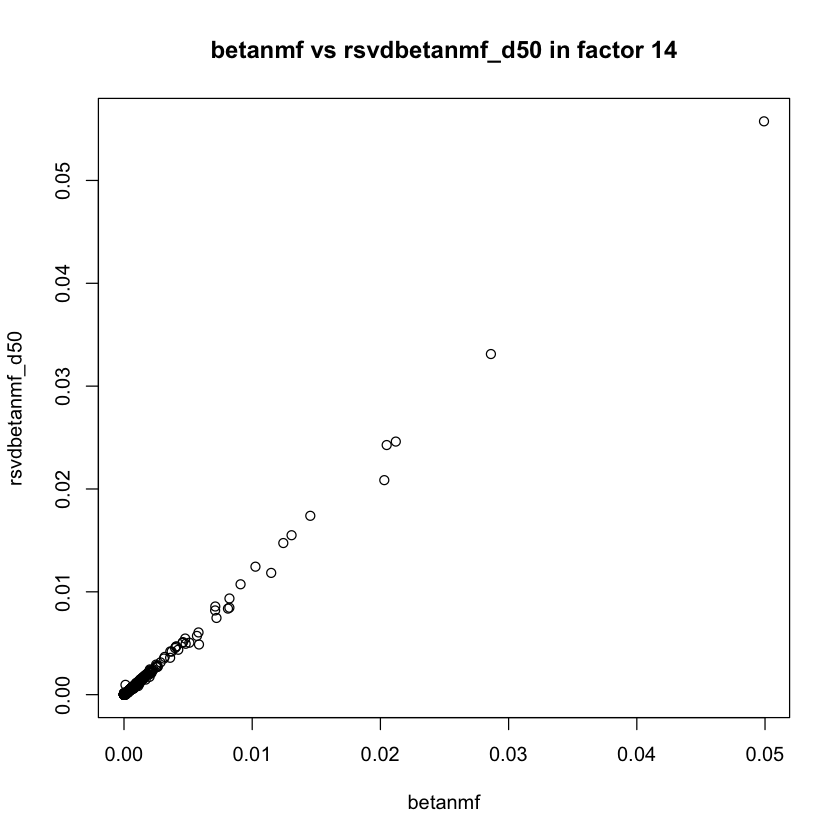

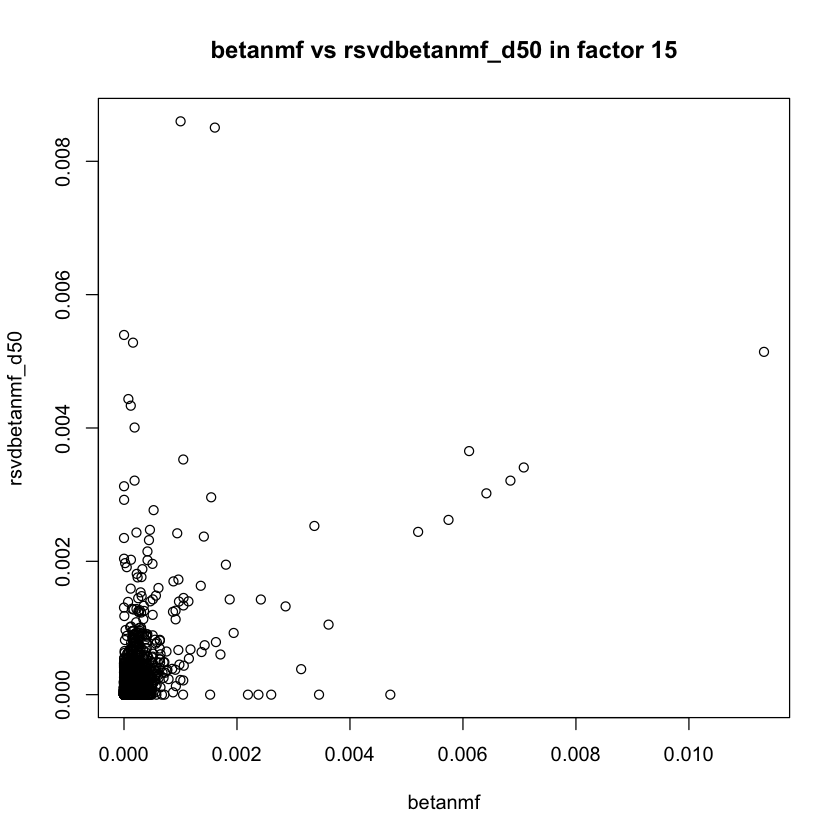

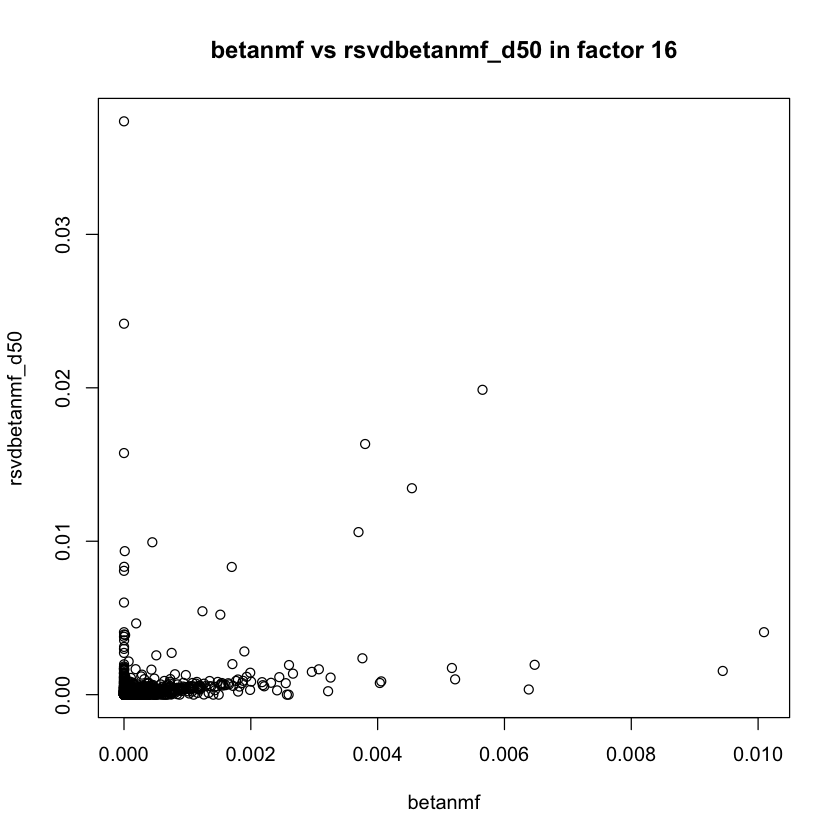

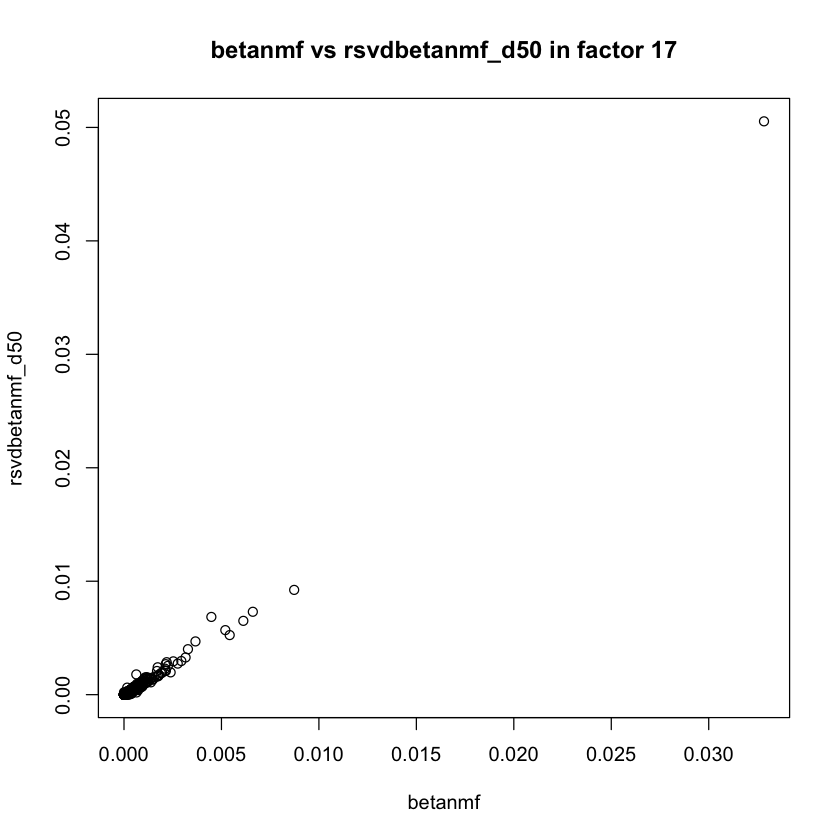

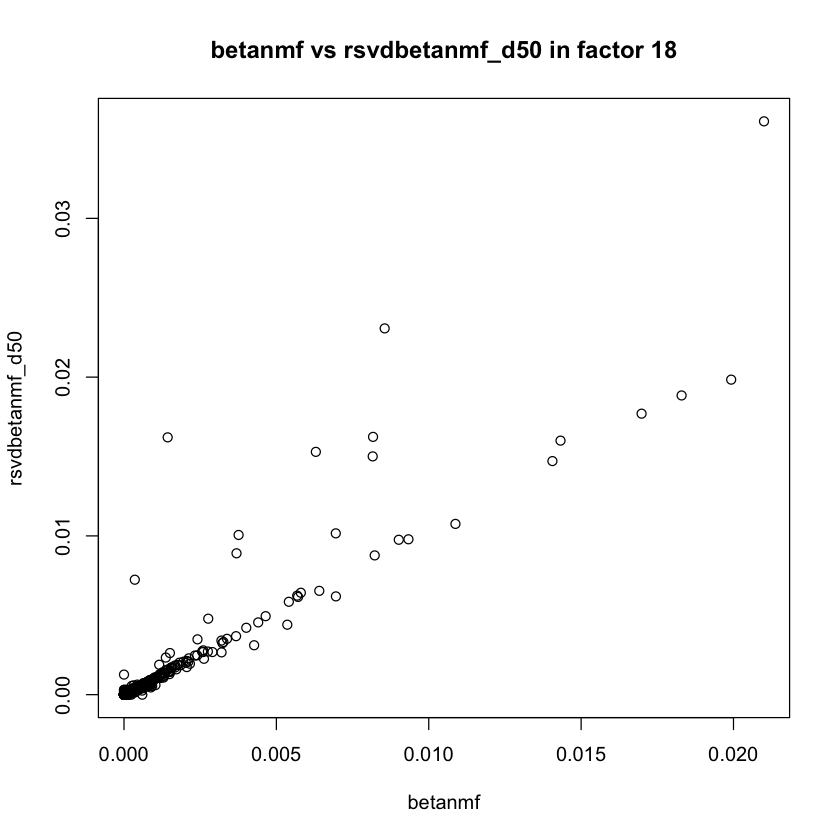

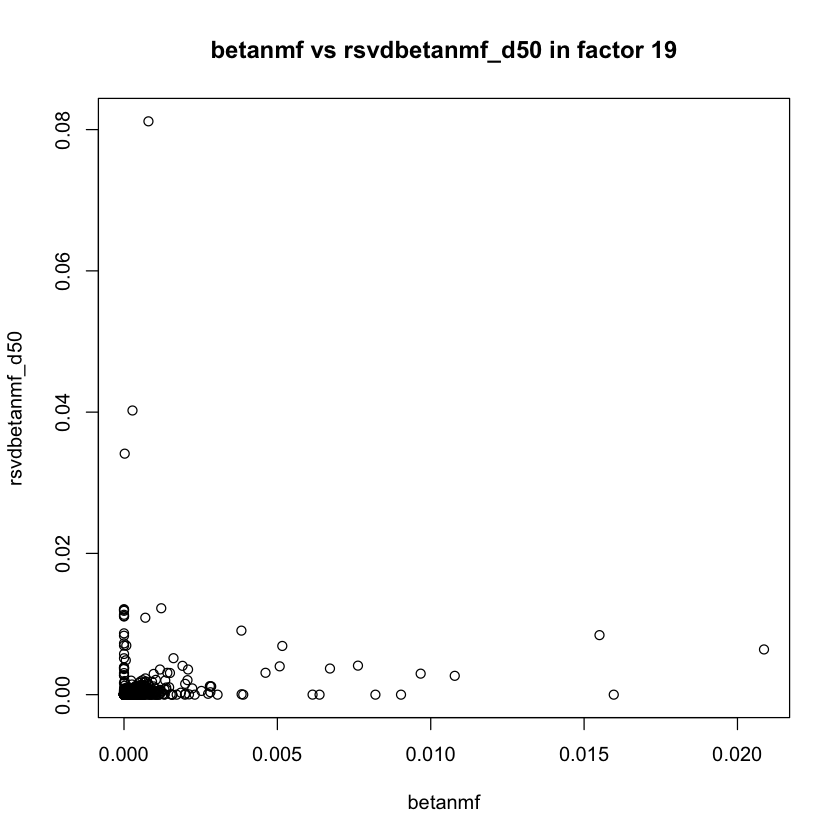

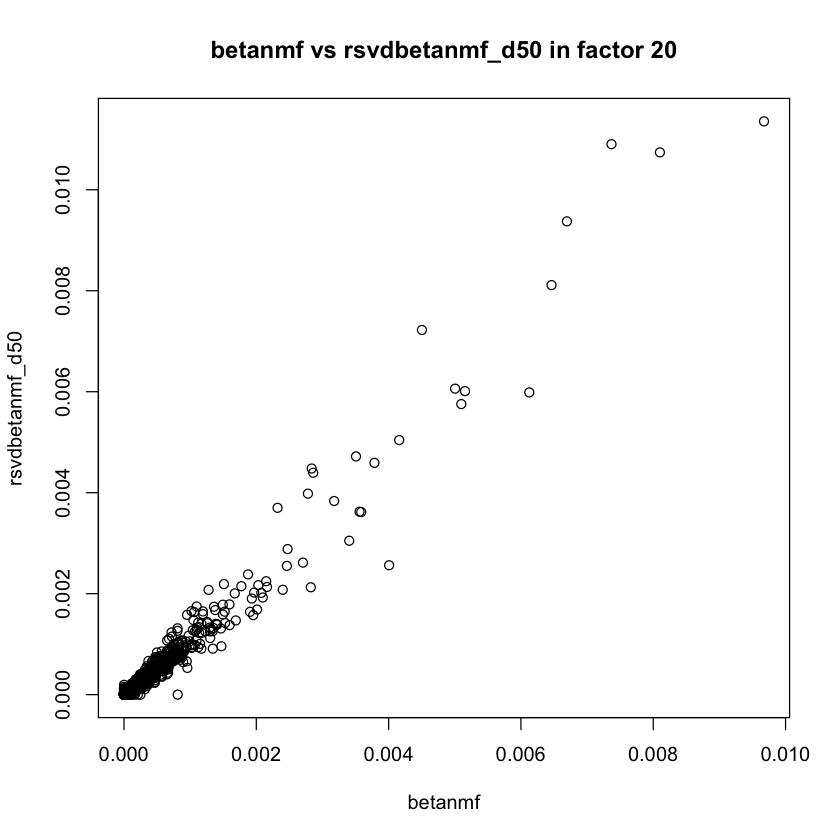

In [3]:
K = ncol(f1)
for(k in 1:K){
    plot(f1[,k], f2[,k], xlab = method1, ylab = method2, 
         main = sprintf("%s vs %s in factor %d", method1, method2, k))
}